<a href="https://colab.research.google.com/github/tcdixon4/the-riddler/blob/master/20200821_hamster_pen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building optimal hamster pens during quarantine


---





## The problem

To make a long story short, the goal is to create a pen for our pet hamster that is as large as can be while limiting the weight of our materials.

Our materials include:

*   A 1m long sheet of fabric weighing 1kg, for creating the perimeter. This may be cut down to a fraction of a meter weighing the same fraction of a kilogram (e.g. 0.5m = 0.5kg)
*   Posts to anchor the fabric, each weighing `k` kg


And our only constraint:

*   The total weight of our fabric and posts must not exceed 1 kg

See [here](https://fivethirtyeight.com/features/can-you-corral-your-hamster/) for full setup.

## Foundational facts

A few foundational pieces of information are required to get going.



1.   **The larger our perimeter (i.e. the more fabric we use) for a given number of posts, the larger our pen will be.** To illustrate this, consider a constant shape magnified 2 times - it increased its area by increasing the perimeter and maintaining all angles. Thus, we will always use the full 1kg of materials allowed.
2.   **The more posts we use for a given length of fabric, the greater the enclosed area for a regular polygon.** We won't spend time defending this, but on the limit that we have infinitely many posts a regular polygon (a polygon with equal side lengths) would become a circle. Circles maximize the area-to-perimeter ratio in 2 dimensions (as spheres maximize the volume-to-surface area ratio in 3 dimensions). 
3.   **For a given number of sides and perimeter, the area of any polygon is maximized when it is regular.** This can be illustrated using a triangle, as seen below:



In [ ]:
#@title
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
fig.tight_layout(pad=5.0)
plt.close()

ax1.set_xlim((-0.4, 0.4))
ax1.set_ylim((-0.2, 0.6))
ax1.set_aspect(1)

polygon, = ax1.fill([])

# for plotting the area values, just calculate it all before hand and pan the 
# axes during animation to make it look like it's appearing
ax2.set_xlim((0, 99))
ax2.set_ylim((0, 0.2))
ax2.set_aspect(100/0.2)
ax2.set_xticks([50])
ax2.set_xticklabels(['Regular'])
ax2.set_yticks([0,0.05,0.1,0.15,0.2])
ax2.set_yticklabels(['0','','','','0.2'])
ax2.set_ylabel('Area (m^2)')

x = np.linspace(0,99,100)
c = (1./3)*np.ones((100,))
b = (1./6) + np.linspace(0,99,100)*(1./300)
a = 1 - b - c
area = np.sqrt(0.5*np.multiply((0.5-a), (0.5-b), (0.5-c)))
line, = ax2.plot(x, area, lw=2)
line2, = ax2.plot(np.array([50,50]), np.array([0,0.2]), 'r', lw=2)
point, = ax2.plot([], [], 'ro')


# initialization function: plot the background of each frame
def init():
    polygon.set_xy(np.empty([3,2]))
    point = ax2.plot([], [], 'ro')
    return (polygon,)


# animation function. This is called sequentially  
def animate(i):
    # generate angle B
    B = np.arccos((a[i]**2 + c[i]**2 - b[i]**2)/(2*a[i]*c[i]))
    # compute missing vertex using angle B
    new_x = (a[i]*np.cos(B) - c[i]/2)
    new_y = a[i]*np.sin(B)
    # plot the triangle
    xy = np.array([[-1./6, 1./6, new_x],[0,0,new_y]]).T
    polygon.set_xy(xy)

    # pan the area plot
    point.set_data([i, area[i]])

    return (polygon,)
  

anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=50, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim
  

## Formalizing the problem

The area of a regular polygon with `n` sides, each of length `s`, is given as:

> $A(n,s) = \frac{ns^2}{4tan(\pi /n)}$


From our "foundational facts" we know we will be using as much of the fabric as possible to create our perimeter. If we use `n` posts, each weighing `k` kg and can use at most 1 kg of materials, then we will use `1-nk` meters of fabric for the perimeter, weighing `1-nk` kg. That means that our perimeter and side length become a function of the post weight. We have the same number of sides as we have posts, and we are using regular polygons with all sides equal, so to convert the perimeter to side length we simply divide the perimeter by `n`. We can now rewrite the area equation using `k`.

> $ A(n,k) = \frac{n(\frac{1-nk}{n})^2}{4tan(\pi /n)}$
> 
> $ \hspace{34pt}= \frac{(1-nk)^2}{4n*tan(\pi /n)}$






## Solving the problem

**How then do we decide the greatest value of `k` for which we would prefer to use 4 posts over 3?**

If we solve the area equation above for both 3 posts and 4 posts, but leave `k` as an unknown, we can find the post weight `k` that makes using either number of posts yield the same pen area. This represents the transition point between 3 or 4 posts being optimal. Above this weight we would use 3, and below it we would use 4. So let's do it:

> $ \hspace{15pt} A(3,k) = A(4,k) $
>
> $ \frac{(1-3k)^2}{4*3*tan(\pi /3)} = \frac{(1-4k)^2}{4*4*tan(\pi /4)} $
>
> $ \Rightarrow k = 0.0896 $

## Generalizing the problem

We may further generalize the question by computing the optimal area for every combination of post number and post weight. If we plot all of these together, we can see the transition points where the optimal post number changes by finding the intersections of lines representing each post number, as below:

Text(0.5, 0, 'Post weight (kg)')

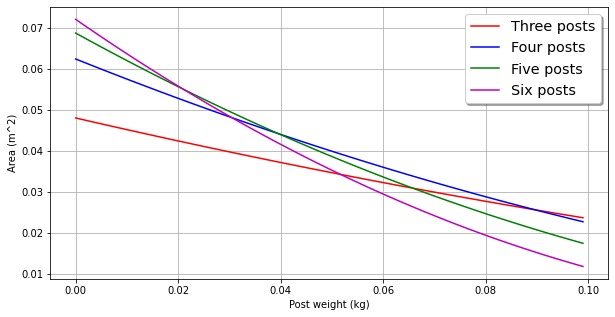

In [ ]:
#@title
def compute_area(num_posts, post_weight):
    return (1-num_posts*post_weight)**2/(4*num_posts*np.tan(np.pi/num_posts))


three = np.ones(100,)
four = np.ones(100,)
five = np.ones(100,)
six = np.ones(100,)
for i in range(100):
  three[i] = compute_area(3, i/1000)
  four[i] = compute_area(4, i/1000)
  five[i] = compute_area(5, i/1000)
  six[i] = compute_area(6, i/1000)

fig, ax = plt.subplots(1,1, figsize=(10, 5))
plt3, = ax.plot(np.linspace(0,0.099,100), three, 'r', label='Three posts')
plt4, = ax.plot(np.linspace(0,0.099,100), four, 'b', label='Four posts')
plt5, = ax.plot(np.linspace(0,0.099,100), five, 'g', label='Five posts')
plt6, = ax.plot(np.linspace(0,0.099,100), six, 'm', label='Six posts')
ax.grid()
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_ylabel('Area (m^2)')
ax.set_xlabel('Post weight (kg)')


For each value of post weight `k` along the x-axis, we would want to choose the number of posts with the largest area, indicated by the color of the highest line. We can see that at the lowest post weights we would choose six posts (magenta), then as the post weight increases we should choose five (green), then four (blue), then three (red).
